In [13]:
import os
import pandas 
import pandas as pd
import csv

In [14]:
df = pd.read_csv ('spreadspoke_scores.csv')
print (df)

      schedule_date  schedule_season schedule_week  schedule_playoff  \
0          9/2/1966             1966             1             False   
1          9/3/1966             1966             1             False   
2          9/4/1966             1966             1             False   
3          9/9/1966             1966             2             False   
4         9/10/1966             1966             1             False   
...             ...              ...           ...               ...   
12673     1/12/2020             2019      Division              True   
12674     1/12/2020             2019      Division              True   
12675     1/19/2020             2019    Conference              True   
12676     1/19/2020             2019    Conference              True   
12677      2/2/2020             2019     Superbowl              True   

                 team_home  score_home  score_away            team_away  \
0           Miami Dolphins          14          23      Oakl

In [15]:
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
9774,9/27/2009,2009,3,False,Baltimore Ravens,34,3,Cleveland Browns,BAL,-13.5,38.5,M&T Bank Stadium,False,71.0,8.0,87,Rain
9780,9/27/2009,2009,3,False,New England Patriots,26,10,Atlanta Falcons,NE,-4.5,45.5,Gillette Stadium,False,64.0,14.0,84,Rain
9781,9/27/2009,2009,3,False,New York Jets,24,17,Tennessee Titans,NYJ,-1.0,36,Giants Stadium,False,66.0,8.0,85,Rain | Fog
9783,9/27/2009,2009,3,False,Philadelphia Eagles,34,14,Kansas City Chiefs,PHI,-7.5,39,Lincoln Financial Field,False,68.0,9.0,88,Fog
9797,10/4/2009,2009,4,False,New England Patriots,27,21,Baltimore Ravens,NE,-2.0,45,Gillette Stadium,False,65.0,5.0,89,Fog


In [16]:
selected_features = df[['score_home','score_away','weather_temperature','weather_wind_mph','weather_humidity']]
selected_features2 = df[['score_home','score_away','weather_temperature','weather_wind_mph','weather_humidity']]



In [25]:
def win_df(selected_features):

    if (selected_features['score_home'] <= selected_features['score_away']):
        return 'loss'
    elif (selected_features['score_home'] > selected_features['score_away']):
        return 'win'
    

selected_features['wins_losses'] = selected_features.apply(win_df, axis = 1)

selected_features

selected_features['total_score'] = selected_features['score_home'] + selected_features['score_away']

selected_features

<ipython-input-25-0052d99cb43d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['wins_losses'] = selected_features.apply(win_df, axis = 1)
<ipython-input-25-0052d99cb43d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['total_score'] = selected_features['score_home'] + selected_features['score_away']


,score_home,score_away,weather_temperature,weather_wind_mph,weather_humidity,wins_losses,total_score
9774,34,3,71.0,8.0,87,win,37
9780,26,10,64.0,14.0,84,win,36
9781,24,17,66.0,8.0,85,win,41
9783,34,14,68.0,9.0,88,win,48
9797,27,21,65.0,5.0,89,win,48
...,...,...,...,...,...,...,...
11039,13,37,59.0,3.0,79,loss,50
11045,10,17,50.0,6.0,94,loss,27
11057,34,20,41.0,8.0,100,win,54
11059,20,6,42.0,5.0,100,win,26


In [26]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
### BEGIN SOLUTION
X = selected_features["weather_temperature"].values.reshape(-1, 1)
y = selected_features["total_score"].values.reshape(-1, 1)
print(X.shape, y.shape)


(100, 1) (100, 1)


In [27]:
# Split the data into training and testing


### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [29]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION


In [30]:
 # Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION



LinearRegression()

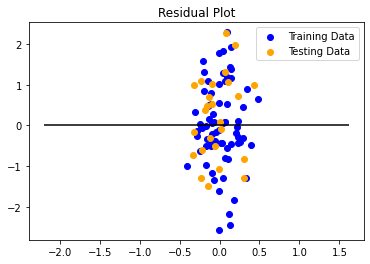

In [31]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model
import matplotlib.pyplot as plt
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

In [32]:
def win_df(selected_features2):

    if (selected_features2['score_home'] <= selected_features2['score_away']):
        return '0'
    elif (selected_features2['score_home'] > selected_features2['score_away']):
        return '1'
    

selected_features2['wins_losses'] = selected_features2.apply(win_df, axis = 1)

selected_features2

selected_features2['total_score'] = df['score_home'] + df['score_away']

selected_features2



target = selected_features2["wins_losses"]
target_names = ["negative", "positive"]

<ipython-input-32-94d148c895da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features2['wins_losses'] = selected_features2.apply(win_df, axis = 1)
<ipython-input-32-94d148c895da>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features2['total_score'] = df['score_home'] + df['score_away']


In [53]:
data = selected_features2.drop(['wins_losses','total_score'], axis=1)
feature_names = data.columns
data.head()

,score_home,score_away,weather_temperature,weather_wind_mph,weather_humidity
9774,34,3,71.0,8.0,87
9780,26,10,64.0,14.0,84
9781,24,17,66.0,8.0,85
9783,34,14,68.0,9.0,88
9797,27,21,65.0,5.0,89


In [54]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [55]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.68

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.88

In [57]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4331323945616428, 'score_away'),
 (0.3089393181256162, 'score_home'),
 (0.10813393711547212, 'weather_temperature'),
 (0.09191114283354582, 'weather_humidity'),
 (0.05788320736372312, 'weather_wind_mph')]